<!-- ---------------------------------------------------- -->
  <div class="col-sm-3 col-md-3 col-lg-3">
	<!-- logo -->  
    <div class="img-responsive">
      <img src="https://dl.dropboxusercontent.com/u/37919918/hedaro/pandas-ipython-tutorials-hedaro.jpg" title="Tensorflow Tutorial | Hedaro" alt="Tensorflow Tutorial | Hedaro">    
    </div>
	<!-- logo -->	
  </div>
<!-- ---------------------------------------------------- --> 
  <div class="col-sm-6 col-md-6 col-lg-6">
	<!-- Tensorflow Tutorial -->  
	  <center>
	    <br>
        <h1>Tensorflow</h1>
        <p><center>06 - Lesson</center></p>
	  </center>	
    <!-- Tensorflow Tutorial -->	
  </div>
<!-- ---------------------------------------------------- -->

# Tunning Your Model

As a Data Scientist you need to be able to tune your model to make sure it is predicting as accurately as possible and doing it as fast as possible. There are a couple of parameters that you will have the opportunity to tweak for the Gradient Descent Optimizer.

> ***Learning Rate*** - Determines how fast your model will learn. The higher the number the faster it will learn.

* If you make the LR ***too high***, your model might osilate between the same two values but never hit the local minimum (or the answer)

* If you make the LR ***too small***, you might need significant more iterations to get to the local minimum  

* Typical LR range: [0.001 - 1]

The goal is to choose the ***highest learning rate*** that will get you the local minimum with as ***few iterations*** as possible.

> ***Iterations*** - Determines the number of iterations you are going to run your model for. You may also hear this referred to as an epoch.

Consider plotting the error output against the number of iterations.
* Make sure the error it is decreasing in a consistent manner and decreasing after every iteration
* A flat line could mean you have found your answer

How many iterations are recommended?
- Depends on the problem, it could be a few, it could be many.

# Practice Practice Practice

In [1]:
# import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import sys
import math
%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Tensorflow version ' + tf.VERSION)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Python version 3.5.1 |Anaconda custom (64-bit)| (default, Feb 16 2016, 09:49:46) [MSC v.1900 64 bit (AMD64)]
Tensorflow version 0.12.0-rc0
Pandas version 0.19.0
Numpy version 1.11.0


# Create Test Data  

    y = m * x + b  

* We are going to call our ***x*** variable, ***train_x***  
* We are going to call our ***y*** variable, ***train_y***


In [3]:
# let's generate 100 random samples
train_x = np.random.rand(100).astype(np.float32)

In [4]:
# let's compute y_data using 0.1 for m and 0.3 for b
train_y = 0.1 * train_x + 0.3

# Pick a Large Learning Rate  

In Lesson 4, we used a LR of 0.7

In [5]:
# placeholders
x = tf.placeholder(tf.float32, name="01_x")
y = tf.placeholder(tf.float32, name="01_y")

# variables
W = tf.Variable(np.random.rand())
b = tf.Variable(np.random.rand())
pred = W * train_x + b

# minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(pred - train_y))
optimizer = tf.train.GradientDescentOptimizer(0.8)
train = optimizer.minimize(loss)

# How Good is Your model?  

Set up the following variables to calculate the accuracy rate of your model. You will do that shortly.

In [6]:
# check accuracy of model
correct_prediction = tf.equal(tf.round(pred), tf.round(train_y))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Keep the Number of Iterations at 200

In [7]:
# hold step and error values
t = []

# initialize the variables
init = tf.global_variables_initializer()

# run your graph
with tf.Session() as sess:
    sess.run(init)

    # fit the function.
    for step in range(200):
        # get your data
        train_data = {x:train_x, y:train_y}
        
        # training in progress...
        sess.run(train, feed_dict=train_data)
        
        # capture the step and error for analysis
        t.append((step, sess.run(loss, feed_dict=train_data)))        
            
    # here is where you see how good of a Data Scientist you are        
    print("Accuracy on the Training Set:", accuracy.eval({x: train_x, y: train_y}) )

Accuracy on the Training Set: 0.0


As you can see, since we increased the learning rate, our model tries to learn too quickly and it actually jumps over the local minimum we are after.

# Plot Loss Function vs Iterations  

> Plotting your data is going to give you a clear picture if you need your change your LR and/or the number of iterations.  

As you can see it seems like the model gets worse over time.

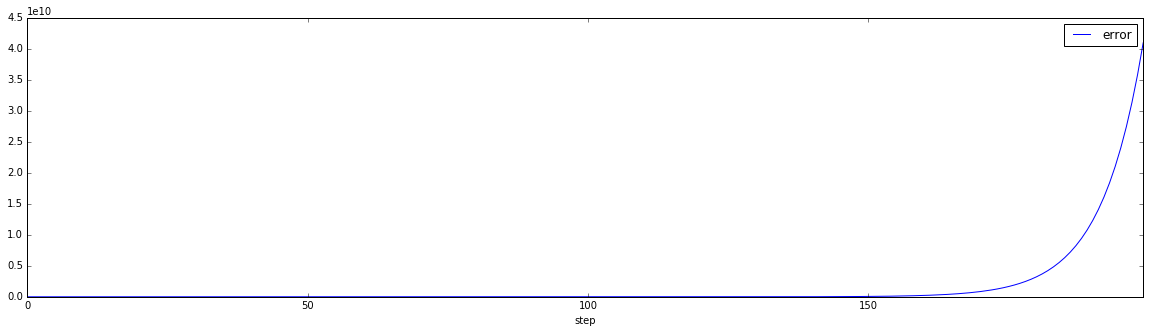

In [8]:
pd.DataFrame(t, columns=['step', 'error']).set_index('step').plot(figsize=(20,5));

# Change the LR to .001 

> The error rate seems to be decreasing over time but you still don't have our answer and the chart does not see to be stabalizing.

# Change the Number of Iterations to 6,000  

> As you can see, you are now really close to the exact answer and the graph is starting to flat line which is exactly what we want to see.

# Your Turn  

* Try different Learning Rates like 0.9, 0.5, 0.2  

> What is the best LR/Iteration combination you can come up with?

<p class="text-muted">This tutorial was created by <a href="http://www.hedaro.com" target="_blank"><strong>HEDARO</strong></a></p>